# 08 - a - Titan - Feasibility Charts - Lift

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

import numpy as np
from scipy import interpolate

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Polygon
import os

In [2]:
# Create a planet object for Titan
planet=Planet("TITAN")

# Load an nominal atmospheric profile with height, temp, pressure, density data
planet.loadAtmosphereModel('../atmdata/Titan/titan-gram-avg.dat', 0 , 1 , 2, 3)

In [10]:
vinf_kms_array = np.linspace( 0.0,   20.0,  11)
LD_array       = np.linspace( 0.0,    0.4 , 11)

In [4]:
os.makedirs('../data/jsr-paper/titan/')

In [11]:
runID = 'titan-lift-'

num_total      = len(vinf_kms_array)*len(LD_array)
count = 1

v0_kms_array    = np.zeros(len(vinf_kms_array))
v0_kms_array[:] = np.sqrt(1.0*(vinf_kms_array[:]*1E3)**2.0 +\
                          2*np.ones(len(vinf_kms_array))*\
                          planet.GM/(planet.RP+1000.0*1.0E3))/1.0E3

overShootLimit_array  = np.zeros((len(v0_kms_array),len(LD_array)))
underShootLimit_array = np.zeros((len(v0_kms_array),len(LD_array)))
exitflag_os_array     = np.zeros((len(v0_kms_array),len(LD_array)))
exitflag_us_array     = np.zeros((len(v0_kms_array),len(LD_array)))
TCW_array             = np.zeros((len(v0_kms_array),len(LD_array)))

In [12]:
planet.h_skip

1000000.0

In [13]:
for i in range(0,len(v0_kms_array)):
    for j in range(0,len(LD_array)):
        vehicle=Vehicle('Apollo', 1000.0, 200.0, LD_array[j], 3.1416, 0.0, 1.00, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,-4.5,0.0,0.0)
        vehicle.setSolverParams(1E-5)
        overShootLimit_array[i,j],  exitflag_os_array[i,j]  = vehicle.findOverShootLimit (6000.0, 1.0, -80.0, -4.0, 1E-10, 1700.0)
        underShootLimit_array[i,j], exitflag_us_array[i,j] =  vehicle.findUnderShootLimit(6000.0, 1.0, -80.0, -4.0, 1E-10, 1700.0)

        TCW_array[i,j] = overShootLimit_array[i,j] - underShootLimit_array[i,j]

        print("Run #"+str(count)+" of "+ str(num_total)+": Arrival V_infty: "+str(vinf_kms_array[i])+" km/s"+", L/D:"+str(LD_array[j]) + " OSL: "+str(overShootLimit_array[i,j])+" USL: "+str(underShootLimit_array[i,j])+", TCW: "+str(TCW_array[i,j])+" EFOS: "+str(exitflag_os_array[i,j])+ " EFUS: "+str(exitflag_us_array[i,j]))
        count = count +1

np.savetxt('../data/jsr-paper/titan/'+runID+'vinf_kms_array.txt',vinf_kms_array)
np.savetxt('../data/jsr-paper/titan/'+runID+'v0_kms_array.txt',v0_kms_array)
np.savetxt('../data/jsr-paper/titan/'+runID+'LD_array.txt',LD_array)
np.savetxt('../data/jsr-paper/titan/'+runID+'overShootLimit_array.txt',overShootLimit_array)
np.savetxt('../data/jsr-paper/titan/'+runID+'exitflag_os_array.txt',exitflag_os_array)
np.savetxt('../data/jsr-paper/titan/'+runID+'undershootLimit_array.txt',underShootLimit_array)
np.savetxt('../data/jsr-paper/titan/'+runID+'exitflag_us_array.txt',exitflag_us_array)
np.savetxt('../data/jsr-paper/titan/'+runID+'TCW_array.txt',TCW_array)

Run #1 of 121: Arrival V_infty: 0.0 km/s, L/D:0.0 OSL: -25.514971257482102 USL: -25.514971257482102, TCW: 0.0 EFOS: 1.0 EFUS: 1.0
Run #2 of 121: Arrival V_infty: 0.0 km/s, L/D:0.04 OSL: -25.45138018635771 USL: -25.580314400805946, TCW: 0.12893421444823616 EFOS: 1.0 EFUS: 1.0
Run #3 of 121: Arrival V_infty: 0.0 km/s, L/D:0.08 OSL: -25.38948930773404 USL: -25.64745317793495, TCW: 0.2579638702009106 EFOS: 1.0 EFUS: 1.0
Run #4 of 121: Arrival V_infty: 0.0 km/s, L/D:0.12 OSL: -25.32925233032438 USL: -25.716441067765118, TCW: 0.3871887374407379 EFOS: 1.0 EFUS: 1.0
Run #5 of 121: Arrival V_infty: 0.0 km/s, L/D:0.16 OSL: -25.270583539615473 USL: -25.78731656072705, TCW: 0.5167330211115768 EFOS: 1.0 EFUS: 1.0
Run #6 of 121: Arrival V_infty: 0.0 km/s, L/D:0.2 OSL: -25.213493534782174 USL: -25.86014109790267, TCW: 0.6466475631204958 EFOS: 1.0 EFUS: 1.0
Run #7 of 121: Arrival V_infty: 0.0 km/s, L/D:0.24 OSL: -25.15796347541982 USL: -25.93496696183138, TCW: 0.7770034864115587 EFOS: 1.0 EFUS: 1.0
Ru

Run #59 of 121: Arrival V_infty: 10.0 km/s, L/D:0.12 OSL: -36.858614949484036 USL: -38.96069325457938, TCW: 2.102078305095347 EFOS: 1.0 EFUS: 1.0
Run #60 of 121: Arrival V_infty: 10.0 km/s, L/D:0.16 OSL: -36.625891531512025 USL: -39.46397802513093, TCW: 2.8380864936189028 EFOS: 1.0 EFUS: 1.0
Run #61 of 121: Arrival V_infty: 10.0 km/s, L/D:0.2 OSL: -36.416870136745274 USL: -40.020147596951574, TCW: 3.6032774602063 EFOS: 1.0 EFUS: 1.0
Run #62 of 121: Arrival V_infty: 10.0 km/s, L/D:0.24 OSL: -36.22781270735504 USL: -40.63134053834801, TCW: 4.403527830992971 EFOS: 1.0 EFUS: 1.0
Run #63 of 121: Arrival V_infty: 10.0 km/s, L/D:0.28 OSL: -36.057115732255625 USL: -41.299823124270915, TCW: 5.242707392015291 EFOS: 1.0 EFUS: 1.0
Run #64 of 121: Arrival V_infty: 10.0 km/s, L/D:0.32 OSL: -35.90142396457668 USL: -42.027264101248875, TCW: 6.1258401366721955 EFOS: 1.0 EFUS: 1.0
Run #65 of 121: Arrival V_infty: 10.0 km/s, L/D:0.36 OSL: -35.75892305646266 USL: -42.81509491542238, TCW: 7.056171858959715

Run #116 of 121: Arrival V_infty: 20.0 km/s, L/D:0.2 OSL: -36.864039080552175 USL: -42.00467576134906, TCW: 5.140636680796888 EFOS: 1.0 EFUS: 1.0
Run #117 of 121: Arrival V_infty: 20.0 km/s, L/D:0.24 OSL: -36.65067914721294 USL: -43.00229972909801, TCW: 6.351620581885072 EFOS: 1.0 EFUS: 1.0
Run #118 of 121: Arrival V_infty: 20.0 km/s, L/D:0.28 OSL: -36.46157456237779 USL: -44.1088317787835, TCW: 7.6472572164057055 EFOS: 1.0 EFUS: 1.0
Run #119 of 121: Arrival V_infty: 20.0 km/s, L/D:0.32 OSL: -36.2923777405631 USL: -45.325105611358595, TCW: 9.032727870795497 EFOS: 1.0 EFUS: 1.0
Run #120 of 121: Arrival V_infty: 20.0 km/s, L/D:0.36 OSL: -36.13915873747828 USL: -46.649327029157575, TCW: 10.510168291679292 EFOS: 1.0 EFUS: 1.0
Run #121 of 121: Arrival V_infty: 20.0 km/s, L/D:0.4 OSL: -36.00003748846211 USL: -48.08002977605793, TCW: 12.079992287595815 EFOS: 1.0 EFUS: 1.0


In [14]:
acc_net_g_max_array       = np.zeros((len(v0_kms_array),len(LD_array)))
stag_pres_atm_max_array   = np.zeros((len(v0_kms_array),len(LD_array)))
q_stag_total_max_array    = np.zeros((len(v0_kms_array),len(LD_array)))
heatload_max_array        = np.zeros((len(v0_kms_array),len(LD_array)))


for i in range(0,len(v0_kms_array)):
    for j in range(0,len(LD_array)):
        vehicle=Vehicle('Apollo', 1000.0, 200.0, LD_array[j], 3.1416, 0.0, 1.00, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,overShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams(1E-5)
        vehicle.propogateEntry (6000.0, 1.0, 180.0)

        # Extract and save variables to plot
        t_min_os         = vehicle.t_minc
        h_km_os          = vehicle.h_kmc
        acc_net_g_os     = vehicle.acc_net_g
        q_stag_con_os    = vehicle.q_stag_con
        q_stag_rad_os    = vehicle.q_stag_rad
        rc_os            = vehicle.rc
        vc_os            = vehicle.vc
        stag_pres_atm_os = vehicle.computeStagPres(rc_os,vc_os)/(1.01325E5)
        heatload_os      = vehicle.heatload

        vehicle=Vehicle('Apollo', 1000.0, 200.0, LD_array[j], 3.1416, 0.0, 1.00, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,underShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams(1E-5)
        vehicle.propogateEntry (6000.0, 1.0, 0.0)

        # Extract and save variable to plot
        t_min_us         = vehicle.t_minc
        h_km_us          = vehicle.h_kmc
        acc_net_g_us     = vehicle.acc_net_g
        q_stag_con_us    = vehicle.q_stag_con
        q_stag_rad_us    = vehicle.q_stag_rad
        rc_us            = vehicle.rc
        vc_us            = vehicle.vc
        stag_pres_atm_us = vehicle.computeStagPres(rc_us,vc_us)/(1.01325E5)
        heatload_us      = vehicle.heatload

        q_stag_total_os  = q_stag_con_os + q_stag_rad_os
        q_stag_total_us  = q_stag_con_us + q_stag_rad_us

        acc_net_g_max_array[i,j]      = max(max(acc_net_g_os),max(acc_net_g_us))
        stag_pres_atm_max_array[i,j]  = max(max(stag_pres_atm_os),max(stag_pres_atm_os))
        q_stag_total_max_array[i,j]   = max(max(q_stag_total_os),max(q_stag_total_us))
        heatload_max_array[i,j]       = max(max(heatload_os),max(heatload_os))

        print("V_infty: "+str(vinf_kms_array[i])+" km/s"+", L/D: "+str(LD_array[j])+" G_MAX: "+str(acc_net_g_max_array[i,j])+" QDOT_MAX: "+str(q_stag_total_max_array[i,j])+" J_MAX: "+str(heatload_max_array[i,j])+" STAG. PRES: "+str(stag_pres_atm_max_array[i,j]))


np.savetxt('../data/jsr-paper/titan/'+runID+'acc_net_g_max_array.txt',acc_net_g_max_array)
np.savetxt('../data/jsr-paper/titan/'+runID+'stag_pres_atm_max_array.txt',stag_pres_atm_max_array)
np.savetxt('../data/jsr-paper/titan/'+runID+'q_stag_total_max_array.txt',q_stag_total_max_array)
np.savetxt('../data/jsr-paper/titan/'+runID+'heatload_max_array.txt',heatload_max_array)

V_infty: 0.0 km/s, L/D: 0.0 G_MAX: 0.08200396558397373 QDOT_MAX: 1.6128023798798288 J_MAX: 1536.7086077036138 STAG. PRES: 0.0016205665732171328
V_infty: 0.0 km/s, L/D: 0.04 G_MAX: 0.08392311894606015 QDOT_MAX: 1.629819830215325 J_MAX: 1549.4686315554088 STAG. PRES: 0.0015848275560768955
V_infty: 0.0 km/s, L/D: 0.08 G_MAX: 0.08602869422199302 QDOT_MAX: 1.647087864777911 J_MAX: 1562.3255686202442 STAG. PRES: 0.0015499792633722183
V_infty: 0.0 km/s, L/D: 0.12 G_MAX: 0.08833020521536614 QDOT_MAX: 1.6646061156614458 J_MAX: 1575.276555200694 STAG. PRES: 0.0015160120666174665
V_infty: 0.0 km/s, L/D: 0.16 G_MAX: 0.09083565523967044 QDOT_MAX: 1.6823680825887173 J_MAX: 1588.1226906463787 STAG. PRES: 0.0014829109068668015
V_infty: 0.0 km/s, L/D: 0.2 G_MAX: 0.0935543723443794 QDOT_MAX: 1.70038296987158 J_MAX: 1601.1925719050464 STAG. PRES: 0.0014506111469076305
V_infty: 0.0 km/s, L/D: 0.24 G_MAX: 0.09649463153723462 QDOT_MAX: 1.7186421978655568 J_MAX: 1614.4140234010536 STAG. PRES: 0.0014192129769

V_infty: 10.0 km/s, L/D: 0.16 G_MAX: 9.123211843153566 QDOT_MAX: 227.4346212823398 J_MAX: 25684.036690082015 STAG. PRES: 0.09556239020263844
V_infty: 10.0 km/s, L/D: 0.2 G_MAX: 9.933163243987483 QDOT_MAX: 234.86622292278759 J_MAX: 26416.068104729147 STAG. PRES: 0.08953886838442343
V_infty: 10.0 km/s, L/D: 0.24 G_MAX: 10.8179558577175 QDOT_MAX: 242.52834053232309 J_MAX: 27139.842437467654 STAG. PRES: 0.08415278974308961
V_infty: 10.0 km/s, L/D: 0.28 G_MAX: 11.779550705937144 QDOT_MAX: 250.42522708056995 J_MAX: 27859.708420616673 STAG. PRES: 0.07936159198627832
V_infty: 10.0 km/s, L/D: 0.32 G_MAX: 12.818848674870084 QDOT_MAX: 258.4227391209814 J_MAX: 28569.882306295385 STAG. PRES: 0.07507493040976887
V_infty: 10.0 km/s, L/D: 0.36 G_MAX: 13.937298288361724 QDOT_MAX: 266.50847024215614 J_MAX: 29269.434006154133 STAG. PRES: 0.07122255489885879
V_infty: 10.0 km/s, L/D: 0.4 G_MAX: 15.133601440757603 QDOT_MAX: 274.7470623382852 J_MAX: 29958.14746933824 STAG. PRES: 0.06775744436973026
V_infty: 

V_infty: 20.0 km/s, L/D: 0.36 G_MAX: 73.93027933188917 QDOT_MAX: 2253.050084093605 J_MAX: 108499.25526656646 STAG. PRES: 0.28495880524512573
V_infty: 20.0 km/s, L/D: 0.4 G_MAX: 81.23020056719713 QDOT_MAX: 2335.6852079278015 J_MAX: 111257.37725859885 STAG. PRES: 0.2701855500987224


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

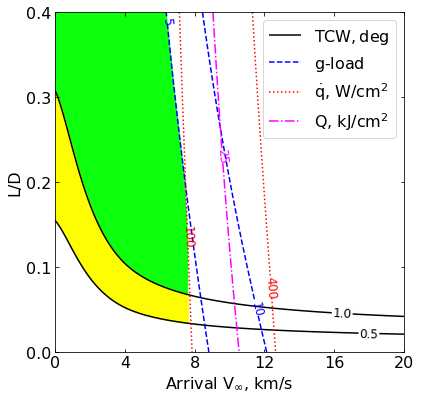

In [15]:
x = np.loadtxt('../data/jsr-paper/titan/'+runID+'vinf_kms_array.txt')
y = np.loadtxt('../data/jsr-paper/titan/'+runID+'LD_array.txt')

Z1 = np.loadtxt('../data/jsr-paper/titan/'+runID+'TCW_array.txt')
G1 = np.loadtxt('../data/jsr-paper/titan/'+runID+'acc_net_g_max_array.txt')
Q1 = np.loadtxt('../data/jsr-paper/titan/'+runID+'q_stag_total_max_array.txt')
H1 = np.loadtxt('../data/jsr-paper/titan/'+runID+'heatload_max_array.txt')
S1 = np.loadtxt('../data/jsr-paper/titan/'+runID+'stag_pres_atm_max_array.txt')


f1 = interpolate.interp2d(x, y, np.transpose(Z1), kind='cubic')
g1 = interpolate.interp2d(x, y, np.transpose(G1), kind='cubic')
q1 = interpolate.interp2d(x, y, np.transpose(Q1), kind='cubic')
h1 = interpolate.interp2d(x, y, np.transpose(H1), kind='cubic')
#s1 = interpolate.interp2d(x, y, transpose(S1), kind='cubic')


x_new =  np.linspace( 0.0,   20,  210)
y_new =  np.linspace( 0.0,   0.4 ,110)
z_new =  np.zeros((len(x_new),len(y_new)))

z1_new =  np.zeros((len(x_new),len(y_new)))
g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
#s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        z1_new[i,j] = f1(x_new[i],y_new[j])
        g1_new[i,j] = g1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])
        #s1_new[i,j] = s1(x_new[i],y_new[j])


Z1 = z1_new
G1 = g1_new
Q1 = q1_new
#S1 = s1_new
H1 = h1_new/1000.0

X, Y = np.meshgrid(x_new, y_new)


Zlevels = np.array([0.5,1.0])

Glevels = np.array([5.0, 10.0])
Qlevels = np.array([100, 400.0])
Hlevels = np.array([25.0])
#Slevels = np.array([0.8])


plt.figure()
#plt.rcParams["font.family"] = "Times New Roman"
#plt.xlim([0.0,30.0])
#plt.ylim([0.0,0.4])
#plt.tight_layout()
#plt.contourf(X, Y, Z, levels=levels)


#plt.axvline(x=25.0,linewidth=3, linestyle='dotted' ,color='red',label=r'$Max.$'+' '+r'$arrival$'+' '+r'$V_{\infty}$'+ r' ' +r'$(LV$'+r' '+r'$C3$'+r' '+r'$limit)$')
#plt.axvline(x=13.1,linewidth=1, linestyle='dotted' ,color='cyan',label=r'$Max.$'+' '+r'$arrival$'+' '+r'$V_{\infty}$'+ r' ' +r'$(Chem. OI)$')

fig = plt.figure()
fig.set_size_inches([6.25,6.25])
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']

ZCS1 = plt.contour(X, Y, np.transpose(Z1), levels=Zlevels, colors='black')




plt.clabel(ZCS1, inline=1, fontsize=12, colors='black',fmt='%.1f',inline_spacing=1)
ZCS1.collections[0].set_linewidths(1.5)
ZCS1.collections[1].set_linewidths(1.5)
ZCS1.collections[0].set_label(r'$TCW, deg$')


GCS1 = plt.contour(X, Y, np.transpose(G1), levels=Glevels, colors='blue',linestyles='dashed')

plt.clabel(GCS1, inline=1, fontsize=12, colors='blue',fmt='%d',inline_spacing=0)
GCS1.collections[0].set_linewidths(1.5)
GCS1.collections[1].set_linewidths(1.5)
GCS1.collections[0].set_label(r'$g$'+r'-load')





QCS1 = plt.contour(X, Y, np.transpose(Q1), levels=Qlevels, colors='red',linestyles='dotted')

plt.clabel(QCS1, inline=1, fontsize=12, colors='red',fmt='%d',inline_spacing=0)
QCS1.collections[0].set_linewidths(1.5)
QCS1.collections[1].set_linewidths(1.5)

QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')


HCS1 = plt.contour(X, Y, np.transpose(H1), levels=Hlevels, colors='magenta',linestyles='dashdot')

plt.clabel(HCS1, inline=1, fontsize=12, colors='magenta',fmt='%d',inline_spacing=0)
HCS1.collections[0].set_linewidths(1.5)

HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')



#SCS1 = plt.contour(X, Y, transpose(S1), levels=Slevels, colors='cyan')

#plt.clabel(SCS1, inline=1, fontsize=12, colors='cyan',fmt='%.1f',inline_spacing=1)
#SCS1.collections[0].set_linewidths(3.0)
#SCS1.collections[0].set_label(r'$Peak$'+r' '+r'$stag. pressure,atm$')

#plt.axhline(y=0.36,linewidth=1, linestyle='dotted' ,color='white',label=r'$Apollo$'+' '+r'$CM$'+' '+r'$L/D$')



#matplotlib.rcParams['text.usetex'] = True
#plt.rc('text', usetex=True)


# circles for b=50 plot
#plt.plot(7.5,0.20,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)
#plt.plot(4.95,0.30,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)

#plt.plot(7.5,0.211,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)
#plt.plot(4.95,0.315,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)


#plt.grid(True,linestyle='dotted', linewidth=0.1)
params = {'mathtext.default': 'regular' }          
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.ylabel("L/D",fontsize=16)
plt.xlabel("Arrival "+r'$V_\infty$'+r', km/s' ,fontsize=16)
plt.xticks(np.array([ 0, 4, 8, 12, 16, 20]), fontsize=16)
plt.yticks(np.array([ 0.0, 0.1, 0.2, 0.3, 0.4]),fontsize=16)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.legend(loc='upper right', fontsize=16)

dat0 = ZCS1.allsegs[1][0]
x1,y1=dat0[:,0],dat0[:,1]
F1 = interpolate.interp1d(x1, y1, kind='linear',fill_value='extrapolate', bounds_error=False)

dat1 = GCS1.allsegs[0][0]
x2,y2=dat1[:,0],dat1[:,1]
F2 = interpolate.interp1d(x2, y2, kind='linear',fill_value='extrapolate', bounds_error=False)

dat2 = QCS1.allsegs[0][0]
x3,y3= dat2[:,0],dat2[:,1]
F3 = interpolate.interp1d(x3, y3, kind='linear',fill_value='extrapolate', bounds_error=False)

dat0a = ZCS1.allsegs[0][0]
x1a,y1a=dat0a[:,0],dat0a[:,1]
F1a = interpolate.interp1d(x1a, y1a, kind='linear',fill_value='extrapolate', bounds_error=False)


x4 = np.linspace(0,20,101)
y4 = F1(x4)
y4a =F1a(x4)
y5 = F2(x4)
y6 = F3(x4)

y7 = np.minimum(y5,y6)
y8 = np.minimum(y4,y6)

plt.fill_between(x4, y4, y7, where=y4<=y7,color='xkcd:neon green')

plt.fill_between(x4, y4a, y8, where=y4a<=y8,color='xkcd:bright yellow')


plt.xlim([0.0,20.0])
plt.ylim([0.0,0.4])

plt.savefig('../data/jsr-paper/titan/titan-lift-small.png', dpi= 300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/titan/titan-lift-small.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/titan/titan-lift-small.eps', dpi=300,bbox_inches='tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


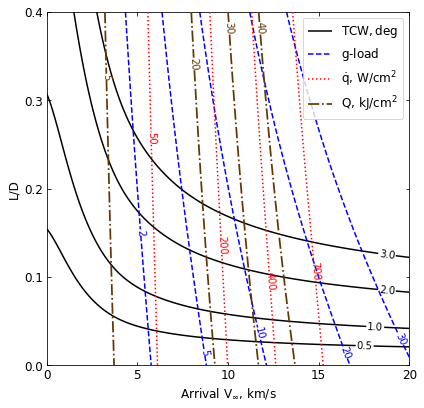

In [16]:
x = np.loadtxt('../data/jsr-paper/titan/'+runID+'vinf_kms_array.txt')
y = np.loadtxt('../data/jsr-paper/titan/'+runID+'LD_array.txt')

Z1 = np.loadtxt('../data/jsr-paper/titan/'+runID+'TCW_array.txt')
G1 = np.loadtxt('../data/jsr-paper/titan/'+runID+'acc_net_g_max_array.txt')
Q1 = np.loadtxt('../data/jsr-paper/titan/'+runID+'q_stag_total_max_array.txt')
H1 = np.loadtxt('../data/jsr-paper/titan/'+runID+'heatload_max_array.txt')
S1 = np.loadtxt('../data/jsr-paper/titan/'+runID+'stag_pres_atm_max_array.txt')


f1 = interpolate.interp2d(x, y, np.transpose(Z1), kind='cubic')
g1 = interpolate.interp2d(x, y, np.transpose(G1), kind='cubic')
q1 = interpolate.interp2d(x, y, np.transpose(Q1), kind='cubic')
h1 = interpolate.interp2d(x, y, np.transpose(H1), kind='cubic')
#s1 = interpolate.interp2d(x, y, transpose(S1), kind='cubic')


x_new =  np.linspace( 0.0,   20,  310)
y_new =  np.linspace( 0.0,   0.4 ,110)
z_new =  np.zeros((len(x_new),len(y_new)))

z1_new =  np.zeros((len(x_new),len(y_new)))
g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
#s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        z1_new[i,j] = f1(x_new[i],y_new[j])
        g1_new[i,j] = g1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])
        #s1_new[i,j] = s1(x_new[i],y_new[j])





Z1 = z1_new

G1 = g1_new

Q1 = q1_new

#S1 = s1_new

H1 = h1_new/1000.0

X, Y = np.meshgrid(x_new, y_new)
#X, Y = meshgrid(x, y)


Zlevels = np.array([0.5,1.0,2.0, 3.0])

Glevels = np.array([2.0, 5.0, 10.0, 20.0, 30.0])
Qlevels = np.array([50.0, 200.0, 400.0, 700.0])
Hlevels = np.array([5.0, 20.0, 30.0, 40.0])
#Slevels = np.array([0.8])


fig = plt.figure()
fig.set_size_inches([6.5,6.5])
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']
#plt.xlim([0.0,30.0])
#plt.ylim([0.0,0.4])
#plt.tight_layout()
#plt.contourf(X, Y, Z, levels=levels)


#plt.axvline(x=25.0,linewidth=3, linestyle='dotted' ,color='red',label=r'$Max.$'+' '+r'$arrival$'+' '+r'$V_{\infty}$'+ r' ' +r'$(LV$'+r' '+r'$C3$'+r' '+r'$limit)$')
#plt.axvline(x=13.1,linewidth=1, linestyle='dotted' ,color='cyan',label=r'$Max.$'+' '+r'$arrival$'+' '+r'$V_{\infty}$'+ r' ' +r'$(Chem. OI)$')


ZCS1 = plt.contour(X, Y, np.transpose(Z1), levels=Zlevels, colors='black',zorder=0)




plt.clabel(ZCS1, inline=1, fontsize=10, colors='black',fmt='%.1f',inline_spacing=1,zorder=0)
ZCS1.collections[0].set_linewidths(1.5)
ZCS1.collections[1].set_linewidths(1.5)
ZCS1.collections[2].set_linewidths(1.5)
ZCS1.collections[3].set_linewidths(1.5)



ZCS1.collections[0].set_label(r'$TCW, deg$')


GCS1 = plt.contour(X, Y, np.transpose(G1), levels=Glevels, colors='blue',linestyles='dashed',zorder=1)

plt.clabel(GCS1, inline=1, fontsize=10, colors='blue',fmt='%d',inline_spacing=0,zorder=1)



GCS1.collections[0].set_linewidths(1.5)
GCS1.collections[1].set_linewidths(1.5)
GCS1.collections[2].set_linewidths(1.5)
GCS1.collections[3].set_linewidths(1.5)
GCS1.collections[4].set_linewidths(1.5)

GCS1.collections[0].set_label(r'$g$'+r'-load')


QCS1 = plt.contour(X, Y, np.transpose(Q1), levels=Qlevels, colors='red',linestyles='dotted',zorder=13)

plt.clabel(QCS1, inline=1, fontsize=10, colors='red',fmt='%d',inline_spacing=0,zorder=13)
QCS1.collections[0].set_linewidths(1.5)
QCS1.collections[1].set_linewidths(1.5)
QCS1.collections[2].set_linewidths(1.5)
QCS1.collections[3].set_linewidths(1.5)


QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')


HCS1 = plt.contour(X, Y, np.transpose(H1), levels=Hlevels, colors='xkcd:brown',linestyles='dashdot',zorder=14)

plt.clabel(HCS1, inline=1, fontsize=10, colors='xkcd:brown',fmt='%d',inline_spacing=0,zorder=14)
HCS1.collections[0].set_linewidths(1.75)
HCS1.collections[1].set_linewidths(1.75)
HCS1.collections[2].set_linewidths(1.75)
HCS1.collections[3].set_linewidths(1.75)



HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')


params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.ylabel("L/D",fontsize=12)
plt.xlabel("Arrival "+r'$V_\infty$'+r', km/s' ,fontsize=12)
plt.xticks(np.array([ 0.0, 5, 10, 15, 20]),fontsize=12)
plt.yticks(np.array([ 0.0, 0.1, 0.2, 0.3, 0.4]),fontsize=12)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.legend(loc='upper right', fontsize=12)



plt.savefig('../data/jsr-paper/titan/titan-lift-large.png', dpi= 300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/titan/titan-lift-large.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/titan/titan-lift-large.eps', dpi=300,bbox_inches='tight')

plt.show()